Модель с ящиком, использующая закон сохранения энергии - стрельба строго в горизонтальном направлении по ящику с песком массой M, закрепленном на стержне длины l. При стрельбе из ружья пуля массой m попадает в ящик, стержень отклоняется на некоторый угол α.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
m = 0.004 # масса пули (кг)
c = 140 # удельная теплоёмкость свинца (Дж/кг*град)
lambd = 25000 # удельная теплота плавления свинца (Дж/кг)
dt = 327 # изменение температуры пули (град)
M = 50 # масса груза (кг)
l = 5 # длина стержня, на котором находится груз (м)
g = 9.80665 # ускорение свободного падения (м/с2)
v0 = 800 # начальная скорость пули (м/с)
h0 = 2 # высота, на которой закреплено ружьё (м)
n = 100 # кол-во попыток
sigma = 0.01

In [3]:
a0 = math.acos(1 - (m*v0**2)/(2*(m+M)*g*l) + (c*m*dt+lambd*m)/((m+M)*g*l))
A = np.random.normal(a0,sigma,n)
V = np.sqrt(2*((m+M)*g*l*(1-np.cos(A)) + (c*m*dt+lambd*m))/m)

Vmin: 784.863432383625 Vmax: 814.0683576629186
Amin: 0.9109607132500924 Amax: 0.9583191238891392


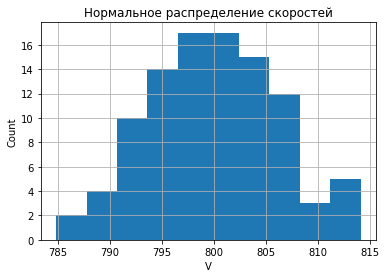

In [4]:
Vmin = min(V)
Vmax = max(V)
x = np.arange(Vmin, Vmax + (Vmax-Vmin)/10, (Vmax-Vmin)/10) # диапазон с заданным шагом
print("Vmin:", Vmin, "Vmax:", Vmax)
print("Amin:", min(A), "Amax:", max(A)) # *180/math.pi
plt.title("Нормальное распределение скоростей") # заголовок
plt.xlabel("V") # ось абсцисс
plt.ylabel("Count") # ось ординат
plt.grid() # включение отображение сетки
plt.hist(V, x)
plt.show()

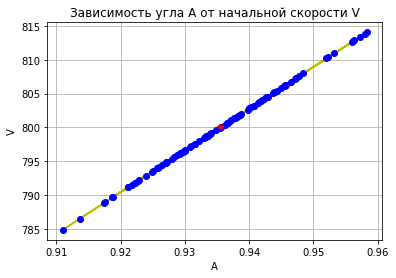

In [5]:
plt.title("Зависимость угла A от начальной скорости V") # заголовок
plt.xlabel("A") # ось абсцисс
plt.ylabel("V") # ось ординат
plt.grid() # включение отображение сетки
plt.plot(A,V,'y',A,V,'ob') # построение графика
plt.plot(a0,v0,'*r') # идеальные a и s
plt.show()

In [26]:
meanV = np.mean(V) # мат.ожидание/среднее
stdV = np.std(V) # среднеквадратичное (стандартное) отклонение
disV = stdV**2 # дисперсия
print("meanV:", meanV, "\nstdV:", stdV, "\ndisV:", disV)

sum = 0
for i in range(n):
    sum = sum + abs(a0-A[i]) * abs(a0-A[i])
dA = math.sqrt(sum/n)
errA = dA/a0 * 100
print("errA:", int(errA), "%")

meanV: 800.7098529439506 
stdV: 5.836295829089208 
disV: 34.06234900464408
errA: 1 %
